In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import itertools as it

In [2]:
def func1(phi,l,lamb):
    
    part1=(lamb-np.cos(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb):
    
    part2=(np.sin(phi))/np.sqrt(1+lamb**2-2*lamb*np.cos(phi))
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb))
    
    return integ1[0]-integ2[0]
def g_s(lambdas):

    g={}
    for n in range(-L,L): 
        for l in lambdas:
            g[n,l]=gfunc(n,l)
    return g

def assign_g(a,b,g,lamb):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*g[(d-1)//2,lamb]
        elif a%2==0:
            
            return -1j*g[-((d+1)//2),lamb]
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(gdic,lam):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,gdic,lam)  
    return np.array(mat)

In [3]:
L=2
lambdarange=np.linspace(0.1,2,500)

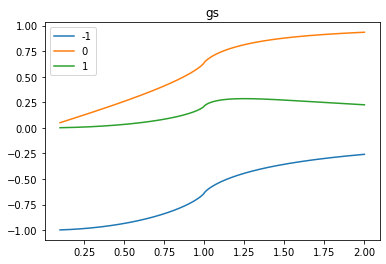

In [4]:
fig,ax=plt.subplots()
for size in range(-L+1,L):
    temp_vec=np.zeros_like(lambdarange)
    for i,lam in enumerate(lambdarange):
        temp_vec[i]=gfunc(size,lam)
    ax.plot(lambdarange,temp_vec,label=size)
plt.title("gs")
plt.legend()
plt.show()

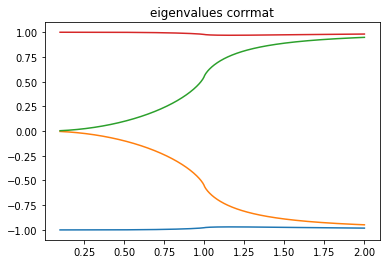

In [5]:
gdic=g_s(lambdarange)
autov={}
for i,x in enumerate(lambdarange):
    matr=get_mat(gdic,x)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
plt.plot(lambdarange,autovals)
plt.title("eigenvalues corrmat")
plt.show()
#questi sono nu1,nu2,-nu2,-nu1

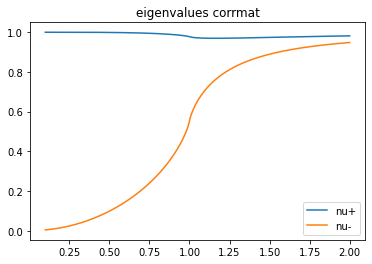

In [6]:
gdic=g_s(lambdarange)
autov={}
for i,x in enumerate(lambdarange):
    matr=get_mat(gdic,x)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
plt.plot(lambdarange,autovals[:,3],label="nu+")
plt.plot(lambdarange,autovals[:,2],label="nu-")
plt.title("eigenvalues corrmat")
plt.legend()
#plt.savefig("nuplot")
plt.show()

Text(0.5, 0.98, '2 site theo')

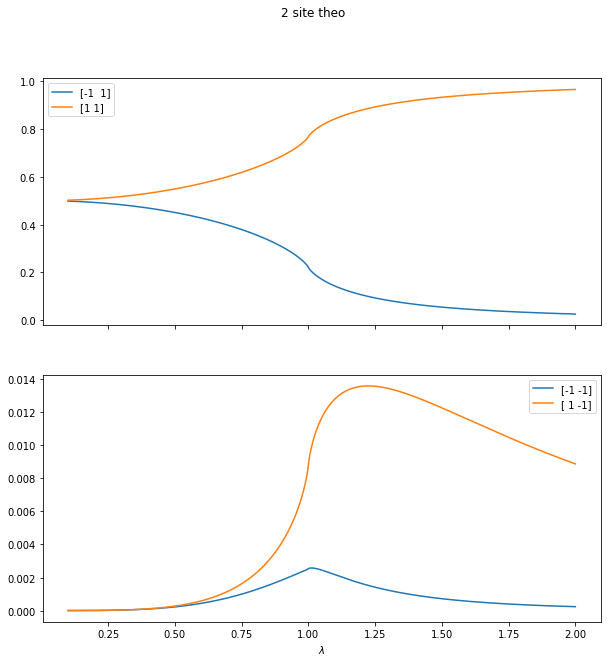

In [7]:
nus=autovals[:,L:]

figs, axs = plt.subplots(2,sharex=True,figsize=[10,10])

eigrho={}
signs={}
for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
    signarr=np.array(sign)
    signs[j]=signarr
    for i,row in enumerate(nus):
        rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
        eigrho[i,j]=np.prod(rowsign)
for k in (1,3):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    axs[0].plot(lambdarange,temp_eigs,label=signs[k])
    axs[0].legend()
for k in (0,2):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    axs[1].plot(lambdarange,temp_eigs,label=signs[k])
    axs[1].legend()
    plt.xlabel(r"$\lambda$")
figs.suptitle("2 site theo")
#plt.savefig("two_site_theo")

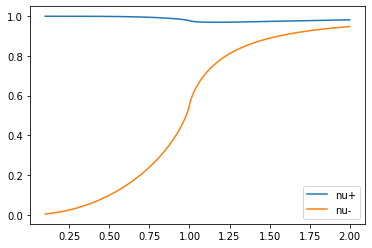

In [8]:
plt.plot(lambdarange,nus[:,1],label="nu+")
plt.plot(lambdarange,nus[:,0],label="nu-")
plt.legend()


In [9]:


def ergo_2(nu_plus,nu_minus,lam):
    
    erg=0
    
    erg+=(nu_plus+nu_minus)/2
    
    erg+=(nu_plus-nu_minus)/(2*np.sqrt(1+4*lam**2))
    
    return erg

def ergo_distant(nu_plus,nu_minus):
    
    erg=0
    
    erg+=(nu_plus+nu_minus)/2
    
    erg+=(nu_plus-nu_minus)/2
    return erg


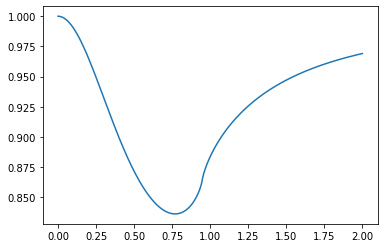

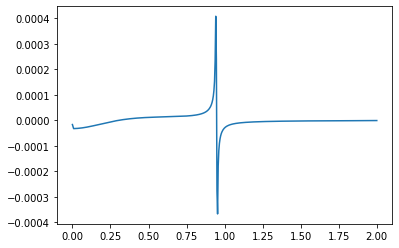

In [10]:
lambdarange=np.linspace(0,2,500)
plt.plot(lambdarange,ergo_2(nus[:,1],nus[:,0],lambdarange))
#plt.savefig("2_site_ergo_theo")
plt.show()

plt.plot(lambdarange,np.gradient(np.gradient(ergo_2(nus[:,1],nus[:,0],lambdarange))))
#plt.savefig("2_site_ergo_theo_secdev")
plt.show()

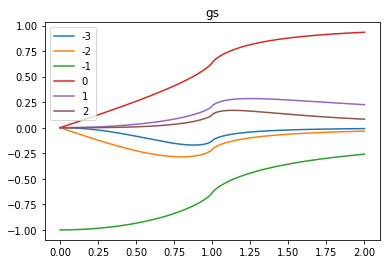

In [11]:
fig,ax=plt.subplots()
for size in range(-3,3):
    temp_vec=np.zeros_like(lambdarange)
    for i,lam in enumerate(lambdarange):
        temp_vec[i]=gfunc(size,lam)
    ax.plot(lambdarange,temp_vec,label=size)
plt.title("gs")
plt.legend()
plt.show()

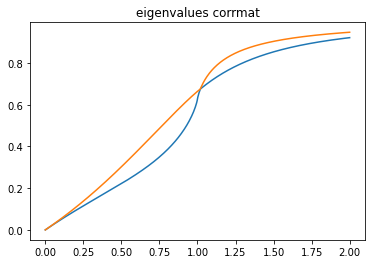

In [12]:
def matr_distant(gfun,lam,d):
    mat = [[0 for c in range(0,2*L)] for r in range(0,2*L)]
    mat[0][1]=gfun(0,lam)
    mat[1][0]=-mat[0][1]
    mat[1][2]=-gfun(-d,lam)
    mat[2][1]=-mat[1][2]
    mat[0][3]=gfun(d,lam)
    mat[3][0]=-mat[0][3]
    mat[2][3]=gfun(0,lam)
    mat[3][2]=-mat[2][3]
    return 1j*np.array(mat)

autov={}
for i,x in enumerate(lambdarange):
    matr=matr_distant(gfunc,x,3)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
plt.plot(lambdarange,autovals[:,2:])
plt.title("eigenvalues corrmat")
plt.show()
#questi sono nu+, nu-..

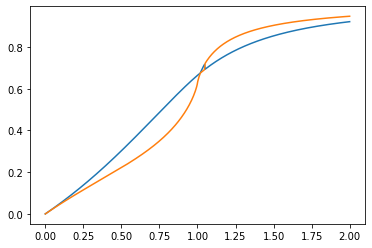

In [13]:
autocorrectedplus=[autovals[j,3] if x<1.05 else autovals[j,2] for j,x in enumerate(lambdarange)]
plt.plot(lambdarange,autocorrectedplus)
autocorrectedminus=[autovals[j,2] if x<1.05 else autovals[j,3] for j,x in enumerate(lambdarange)]
plt.plot(lambdarange,autocorrectedminus)

Text(0.5, 0.98, '2_site_distance_100')

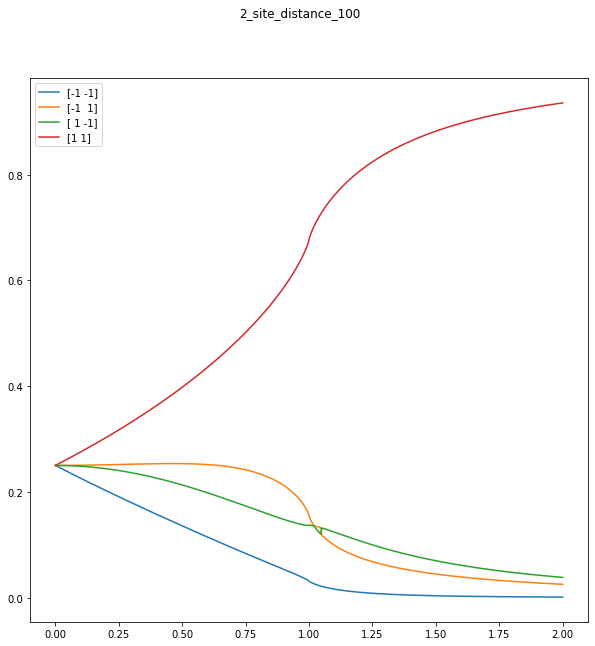

In [14]:
autocorrectedminus=np.array(autocorrectedminus)
autocorrectedplus=np.array(autocorrectedplus)
newnus=np.zeros((len(lambdarange),2))
newnus[:,0]=autocorrectedminus
newnus[:,1]=autocorrectedplus


figs, axs = plt.subplots(1,sharex=True,figsize=[10,10])

eigrho={}
signs={}
for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
    signarr=np.array(sign)
    signs[j]=signarr
    for i,row in enumerate(newnus):
        rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
        eigrho[i,j]=np.prod(rowsign)
for k in range(4):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    plt.plot(lambdarange,temp_eigs,label=signs[k])
    plt.legend()
figs.suptitle("2_site_distance_100")

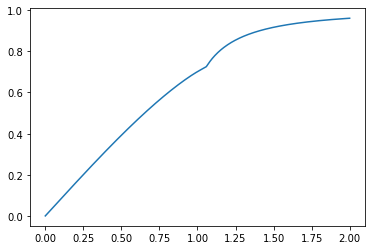

In [15]:
def nuplus(gfun,lam,d):
    a=gfun(d,lam)-gfun(-d,lam)
    a=(a/2)**2
    a=a+(gfun(0,lam))**2
    a=np.sqrt(a)
    b=abs(gfun(d,lam)+gfun(-d,lam))
    b=b/2
    return a+b
def numinus(gfun,lam,d):
    a=gfun(d,lam)-gfun(-d,lam)
    a=(a/2)**2
    a=a+(gfun(0,lam))**2
    a=np.sqrt(a)
    b=abs(gfun(d,lam)+gfun(-d,lam))
    b=b/2
    return a-b
nuplusvec=[nuplus(gfunc,x,2) for x in lambdarange]
plt.plot(lambdarange,nuplusvec)


Text(0.5, 0.98, '2_site_distance_2')

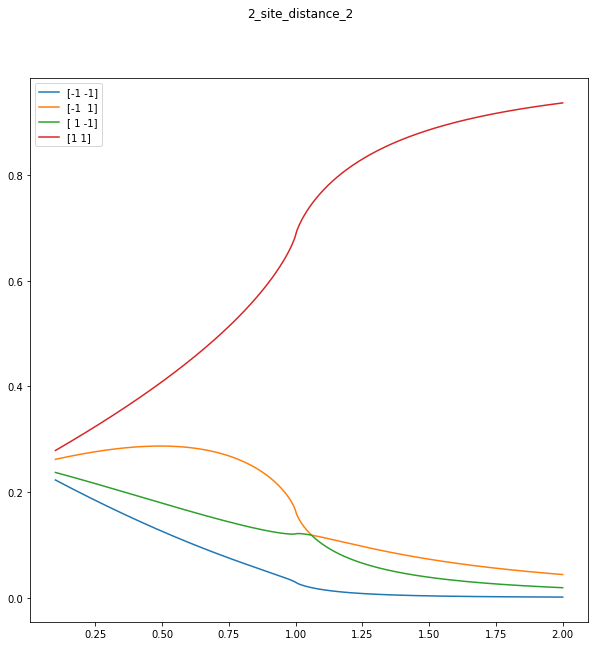

In [20]:
autov={}

d=2


for i,x in enumerate(lambdarange):
    matr=matr_distant(gfunc,x,d)
    autov[i]=eigvalsh(matr)
    
autovals=np.array([autov[i] for i in autov])
newnus=autovals[:,L:]

figs, axs = plt.subplots(1,sharex=True,figsize=[10,10])

eigrho={}
signs={}
for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
    signarr=np.array(sign)
    signs[j]=signarr
    for i,row in enumerate(newnus):
        rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
        eigrho[i,j]=np.prod(rowsign)
for k in range(4):
    temp_eigs=[]
    temp_eigs=[eigrho[x,k] for x in range(len(lambdarange))]
    plt.plot(lambdarange,temp_eigs,label=signs[k])
    plt.legend()
figs.suptitle("2_site_distance_{}".format(d))


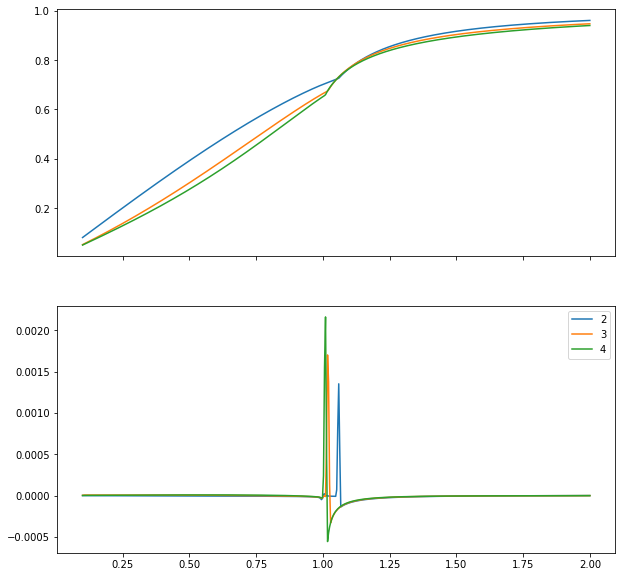

In [17]:
autov={}
lambdarange=np.linspace(0.1,2,500)
figs_dergs, axs_dergs = plt.subplots(2,sharex=True,figsize=[10,10])
for d in range(2,5):
    for i,x in enumerate(lambdarange):
        matr=matr_distant(gfunc,x,d)
        autov[i]=eigvalsh(matr)

    autovals=np.array([autov[i] for i in autov])
    newnus=autovals[:,L:]

    eigrho={}
    signs={}
    for j,sign in enumerate(it.product((range(-1,2,2)),repeat=L)):
        signarr=np.array(sign)
        signs[j]=signarr
        for i,row in enumerate(newnus):
            rowsign=np.array([(1+signarr[n]*row[n])/2 for n in range(L)])
            eigrho[i,j]=np.prod(rowsign)

    ergdisvec=ergo_distant(newnus[:,1],newnus[:,0])
    axs_dergs[0].plot(lambdarange,ergdisvec,label=d)
    #plt.savefig("2_site_distant_ergo_theo")

    axs_dergs[1].plot(lambdarange,np.gradient(np.gradient(ergdisvec)),label=d)
    #plt.savefig("2_site_distant_ergo_theo_secdev")
plt.legend()
plt.show()
#ergotropia torna come singolo sito